<a href="https://colab.research.google.com/github/SahinCatkin/Bootcamp/blob/main/Satellite_Imagery_Segmentation_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [3]:
minmaxscaler = MinMaxScaler()

In [4]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset'


total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 2 root root 4.0K May 17 14:34 'Tile 1'
drwx------ 2 root root 4.0K May 17 14:34 'Tile 2'
drwx------ 2 root root 4.0K May 17 14:34 'Tile 3'
drwx------ 2 root root 4.0K May 17 14:34 'Tile 4'
drwx------ 2 root root 4.0K May 17 14:34 'Tile 5'
drwx------ 2 root root 4.0K May 17 14:34 'Tile 6'
drwx------ 2 root root 4.0K May 17 14:34 'Tile 7'
drwx------ 2 root root 4.0K May 17 14:34 'Tile 8'


In [5]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset'

In [6]:
dataset_name = 'DubaiDataset'

In [7]:
for path, subdirs, files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')):
        #print(image_name)
        a = True

/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/Semantic segmentation dataset/DubaiDataset/Tile 2/masks


In [8]:
image_patch_size = 256

In [9]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [10]:
image.shape

(544, 509, 3)

In [11]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [12]:
len(image_patches)

2

In [13]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [14]:
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [15]:
image_y[0].shape

(256, 256, 3)

In [16]:
print(type(image))

<class 'numpy.ndarray'>


In [17]:
type(Image.fromarray(image))

PIL.Image.Image

In [18]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [19]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [20]:
image_dataset = []
mask_dataset = []
for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png' 
  for tile_id in range(1,8):
      for image_id in range (1,20):
        image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
        if image is not None:
          if image_type == 'masks':
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
          #print(image.shape)
          size_x = (image.shape[1]//image_patch_size)*image_patch_size
          size_y = (image.shape[0]//image_patch_size)*image_patch_size
          #print("{} --- {} - {}".format(image.shape, size_x, size_y))
          image = Image.fromarray(image)
          image = image.crop((0,0, size_x, size_y))
          #print("({},  {})".format(image.size[0],image.size[1]))
          image = np.array(image)
          patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
          #print(len(patched_images))
          for i in range(patched_images.shape[0]):
            for j in range(patched_images.shape[1]):
              if image_type == 'images':
                individual_patched_image = patched_images[i,j,:,:]
                #print(individual_patched_image.shape)
                individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
                individual_patched_image = individual_patched_image[0]
                #print(individual_patched_image.shape)
                image_dataset.append(individual_patched_image)
              elif image_type == 'masks':
                individual_patched_mask = patched_images[i,j,:,:]
                individual_patched_mask = individual_patched_mask[0]
                mask_dataset.append(individual_patched_mask)  


In [21]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [22]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [23]:
type(image_dataset[0])

numpy.ndarray

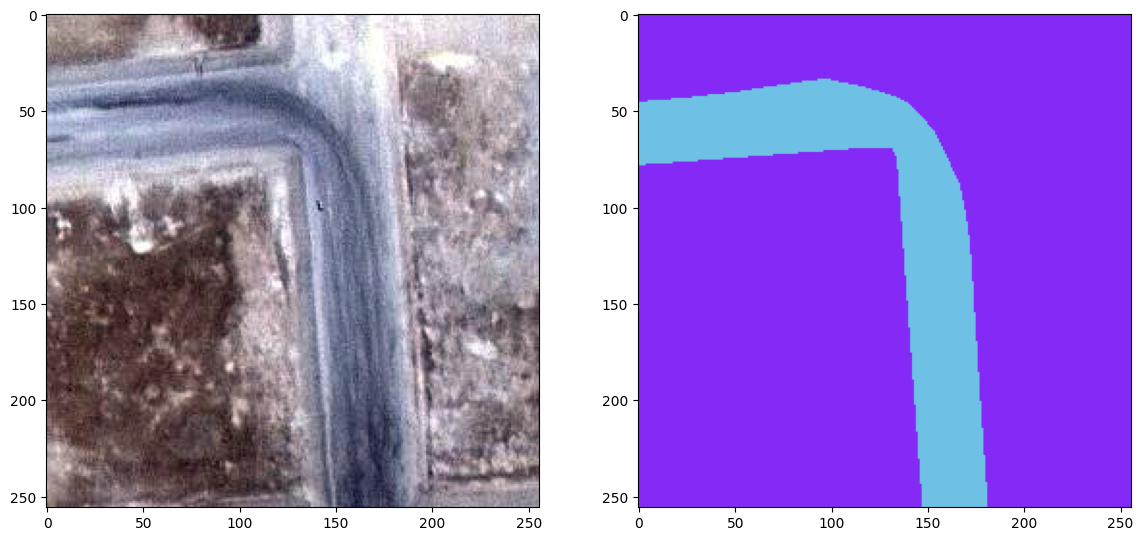

In [24]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [25]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [26]:
mask_dataset.shape[0]

945

In [27]:
label = individual_patched_mask

In [28]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [29]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [30]:
print(len(labels))

945


In [31]:
labels = np.array(labels)

In [32]:
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [33]:
labels = np.expand_dims(labels, axis=3)

In [34]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [35]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [36]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


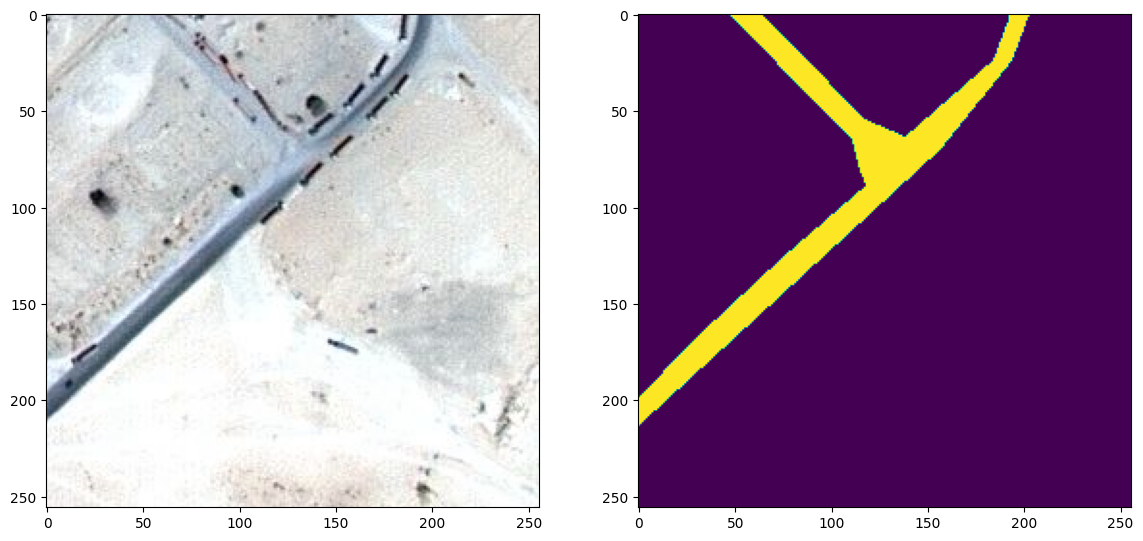

In [37]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [38]:
labels[0][:,:,0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [39]:
total_classes = len(np.unique(labels))

In [40]:
total_classes

6

In [41]:
from tensorflow.keras.utils import to_categorical

In [42]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [43]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [44]:
master_training_dataset = image_dataset

In [45]:
master_training_dataset.shape

(945, 256, 256, 3)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(803, 256, 256, 3) (142, 256, 256, 3) (803, 256, 256, 6) (142, 256, 256, 6)


In [49]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [50]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# **part 2 - deep learning**




In [51]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.2 MB/s eta 0:00:00


In [52]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [53]:
from keras import backend as K

In [54]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [55]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [56]:
metrics = ["accuracy", jaccard_coef]

In [57]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [58]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes, 
                          image_height=image_height, 
                          image_width=image_width, 
                          image_channels=image_channels)

In [59]:
model = get_deep_learning_model()

# **Generating Loss Function**

In [60]:
weights = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]

In [61]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [62]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [63]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [64]:
total_loss = dice_loss + (1 * focal_loss)

# **model compilation**

In [65]:
import tensorflow as tf

In [66]:
tf.keras.backend.clear_session()

In [67]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [68]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/10
51/51 [==============================] - 36s 267ms/step - loss: 1.0042 - accuracy: 0.5506 - jaccard_coef: 0.2409 - val_loss: 0.9936 - val_accuracy: 0.6453 - val_jaccard_coef: 0.2901
Epoch 2/10
51/51 [==============================] - 10s 187ms/step - loss: 0.9787 - accuracy: 0.6789 - jaccard_coef: 0.3708 - val_loss: 0.9728 - val_accuracy: 0.6594 - val_jaccard_coef: 0.3965
Epoch 3/10
51/51 [==============================] - 10s 187ms/step - loss: 0.9622 - accuracy: 0.7137 - jaccard_coef: 0.4502 - val_loss: 0.9647 - val_accuracy: 0.6795 - val_jaccard_coef: 0.4260
Epoch 4/10
51/51 [==============================] - 10s 188ms/step - loss: 0.9572 - accuracy: 0.7267 - jaccard_coef: 0.4807 - val_loss: 0.9689 - val_accuracy: 0.6583 - val_jaccard_coef: 0.4146
Epoch 5/10
51/51 [==============================] - 10s 189ms/step - loss: 0.9530 - accuracy: 0.7396 - jaccard_coef: 0.5027 - val_loss: 0.9841 - val_accuracy: 0.6332 - val_jaccard_coef: 0.4057
Epoch 6/10
51/51 [=================

In [69]:
history_a = model_history

In [70]:
history_a.history

{'loss': [1.0042110681533813,
  0.9786657691001892,
  0.9622265100479126,
  0.9571936130523682,
  0.9530208110809326,
  0.9466421008110046,
  0.940552294254303,
  0.936306893825531,
  0.9322149753570557,
  0.9315575957298279],
 'accuracy': [0.5506481528282166,
  0.6789360046386719,
  0.7136602997779846,
  0.7267420291900635,
  0.7395586371421814,
  0.7597623467445374,
  0.7780176401138306,
  0.7895519137382507,
  0.8022508025169373,
  0.8039584159851074],
 'jaccard_coef': [0.2408597618341446,
  0.37084296345710754,
  0.4502135217189789,
  0.4806666672229767,
  0.5027273297309875,
  0.5387031435966492,
  0.5671656727790833,
  0.5858049392700195,
  0.606289803981781,
  0.608450174331665],
 'val_loss': [0.9936006665229797,
  0.972840428352356,
  0.9646862149238586,
  0.9689183831214905,
  0.9840908646583557,
  0.9678913354873657,
  0.9672328233718872,
  0.9511856436729431,
  0.9625151753425598,
  0.9501352310180664],
 'val_accuracy': [0.6452824473381042,
  0.6593843102455139,
  0.67947441

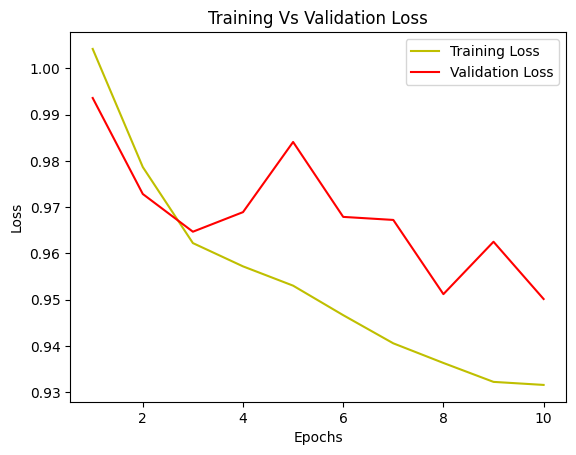

In [71]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

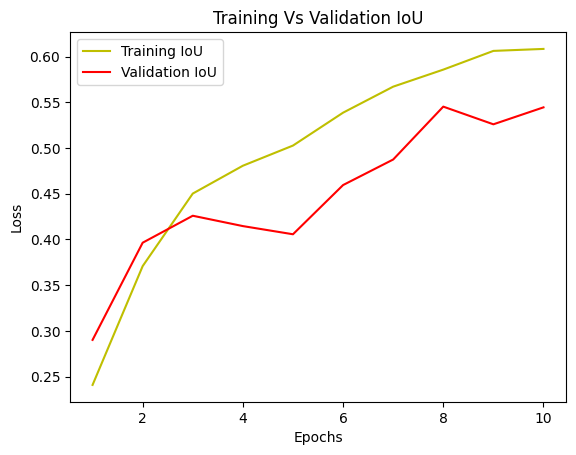

In [72]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [73]:
model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [74]:
y_pred = model.predict(X_test)

5/5 [==============================] - 3s 56ms/step


In [75]:
len(y_pred)

142

In [76]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [77]:
len(y_pred_argmax)

142

In [78]:
y_test_argmax = np.argmax(y_test, axis=3)

In [79]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

# **Comparing prediction results**

In [83]:
import random

In [89]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

1/1 [==============================] - 0s 26ms/step


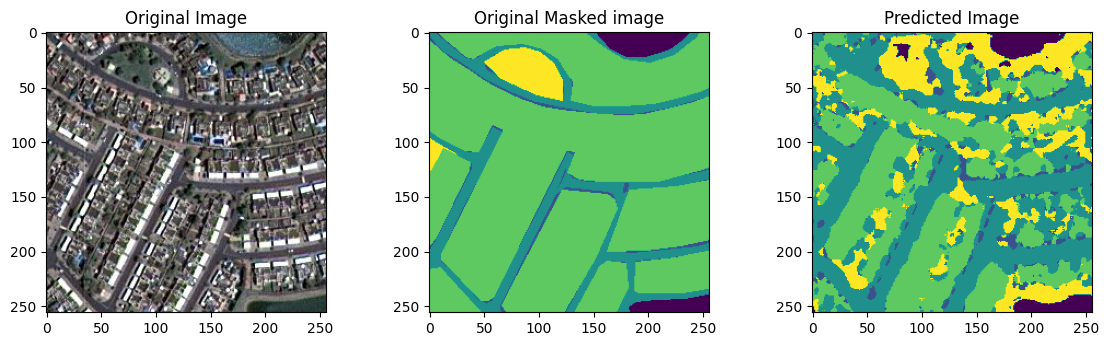

In [90]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)